In [1]:

import pandas as pd

import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("flights.csv") 
print(data)

        flight    time  wind_speed  wind_angle  battery_voltage  \
0            1    0.00         0.1        12.0        24.222174   
1            1    0.20         0.1         3.0        24.227180   
2            1    0.30         0.1       352.0        24.225929   
3            1    0.50         0.1       354.0        24.224678   
4            1    0.60         0.1       359.0        24.210905   
...        ...     ...         ...         ...              ...   
257891     279  152.10         1.1       198.0        22.857437   
257892     279  152.20         1.1       196.0        22.847422   
257893     279  152.41         1.2       189.0        22.856186   
257894     279  152.60         1.1       187.0        22.854933   
257895     279  152.70         1.1       184.0        22.861195   

        battery_current  position_x  position_y  position_z  orientation_x  \
0              0.087470  -79.782396   40.458047  269.332402       0.001772   
1              0.095421  -79.782396   4

C:\Users\THOMAS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.dtypes

flight                     int64
time                     float64
wind_speed               float64
wind_angle               float64
battery_voltage          float64
battery_current          float64
position_x               float64
position_y               float64
position_z               float64
orientation_x            float64
orientation_y            float64
orientation_z            float64
orientation_w            float64
velocity_x               float64
velocity_y               float64
velocity_z               float64
angular_x                float64
angular_y                float64
angular_z                float64
linear_acceleration_x    float64
linear_acceleration_y    float64
linear_acceleration_z    float64
speed                    float64
payload                  float64
altitude                  object
date                      object
time_day                  object
route                     object
dtype: object

In [4]:
from datetime import datetime
from datetime import timedelta

In [5]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [6]:
data['time_day'] = pd.to_timedelta(data['time_day'] + ':00')

In [7]:
data['datetime'] = data['date'] + data['time_day']

In [8]:
data.dtypes

flight                             int64
time                             float64
wind_speed                       float64
wind_angle                       float64
battery_voltage                  float64
battery_current                  float64
position_x                       float64
position_y                       float64
position_z                       float64
orientation_x                    float64
orientation_y                    float64
orientation_z                    float64
orientation_w                    float64
velocity_x                       float64
velocity_y                       float64
velocity_z                       float64
angular_x                        float64
angular_y                        float64
angular_z                        float64
linear_acceleration_x            float64
linear_acceleration_y            float64
linear_acceleration_z            float64
speed                            float64
payload                          float64
altitude        

In [9]:
data.describe()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,time_day
count,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,...,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896.000000,257896
mean,162.445513,97.766940,4.337992,169.470760,22.435459,17.932477,-77.773754,39.438805,295.812932,-0.010096,...,0.296500,-0.001222,0.000121,0.028713,-0.317346,0.017140,-9.795682,7.325116,240.937238,0 days 13:16:25.313924993
std,71.445026,62.667401,3.494649,101.176006,1.200742,10.865654,12.506800,6.342148,58.305928,0.047414,...,1.459703,0.116713,0.175669,0.251162,0.772273,0.460883,0.462295,3.209065,211.373066,0 days 03:32:34.143258501
min,1.000000,0.000000,0.000000,0.000000,18.810810,-0.326023,-79.946543,0.000000,0.000000,-0.546413,...,-4.015751,-2.279608,-3.674915,-1.857536,-5.889537,-9.108024,-22.687924,0.000000,0.000000,0 days 03:10:00
25%,112.000000,46.200000,1.500000,80.000000,21.513987,7.140693,-79.782786,40.458878,271.311215,-0.023949,...,-0.143707,-0.043230,-0.038335,-0.040691,-0.691028,-0.203128,-9.895812,4.000000,0.000000,0 days 10:10:00
50%,166.000000,93.000000,3.300000,177.000000,22.306536,21.923040,-79.782747,40.458994,292.120051,-0.001910,...,0.028842,-0.000317,0.000070,0.001101,-0.052744,0.010875,-9.801070,8.000000,250.000000,0 days 12:15:00
75%,223.000000,141.400000,6.500000,244.000000,23.162939,25.270737,-79.782259,40.459057,325.245442,0.010370,...,0.850420,0.041166,0.040656,0.051446,0.179579,0.227538,-9.661465,10.000000,500.000000,0 days 16:41:00
max,279.000000,428.290000,18.100000,359.000000,25.894913,47.193779,0.000000,40.459682,376.188721,0.414962,...,5.842570,3.022839,2.833664,2.172410,4.647753,7.139876,-3.830504,12.000000,750.000000,0 days 22:31:00


In [10]:
data['altitude']

0                   25
1                   25
2                   25
3                   25
4                   25
              ...     
257891    25-50-100-25
257892    25-50-100-25
257893    25-50-100-25
257894    25-50-100-25
257895    25-50-100-25
Name: altitude, Length: 257896, dtype: object

In [11]:
data.drop('altitude', axis=1, inplace=True)


In [12]:
data.isna().sum()

flight                   0
time                     0
wind_speed               0
wind_angle               0
battery_voltage          0
battery_current          0
position_x               0
position_y               0
position_z               0
orientation_x            0
orientation_y            0
orientation_z            0
orientation_w            0
velocity_x               0
velocity_y               0
velocity_z               0
angular_x                0
angular_y                0
angular_z                0
linear_acceleration_x    0
linear_acceleration_y    0
linear_acceleration_z    0
speed                    0
payload                  0
date                     0
time_day                 0
route                    0
datetime                 0
dtype: int64

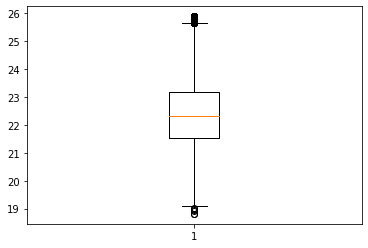

In [13]:
plt.boxplot(data['battery_voltage']) 
plt.show()
     

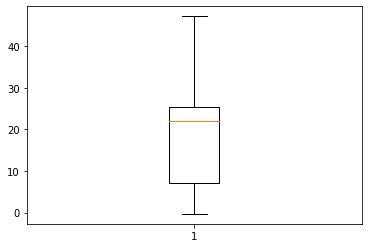

In [14]:
plt.boxplot(data['battery_current']) 
plt.show()
     

In [15]:
import seaborn as sns


C:\Users\THOMAS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='battery_voltage'>

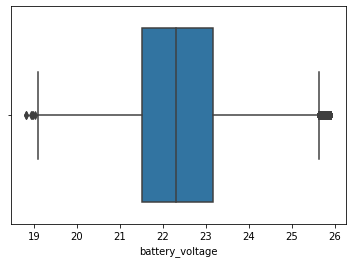

In [16]:
sns.boxplot(data['battery_voltage'])


C:\Users\THOMAS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='battery_current'>

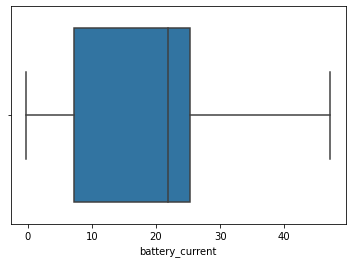

In [17]:
sns.boxplot(data['battery_current'])

In [18]:
print(data)

        flight    time  wind_speed  wind_angle  battery_voltage  \
0            1    0.00         0.1        12.0        24.222174   
1            1    0.20         0.1         3.0        24.227180   
2            1    0.30         0.1       352.0        24.225929   
3            1    0.50         0.1       354.0        24.224678   
4            1    0.60         0.1       359.0        24.210905   
...        ...     ...         ...         ...              ...   
257891     279  152.10         1.1       198.0        22.857437   
257892     279  152.20         1.1       196.0        22.847422   
257893     279  152.41         1.2       189.0        22.856186   
257894     279  152.60         1.1       187.0        22.854933   
257895     279  152.70         1.1       184.0        22.861195   

        battery_current  position_x  position_y  position_z  orientation_x  \
0              0.087470  -79.782396   40.458047  269.332402       0.001772   
1              0.095421  -79.782396   4

In [19]:

data['power'] = data['battery_voltage'] * data['battery_current']

# drop voltage and current columns
data = data.drop(['battery_voltage', 'battery_current'], axis=1)

print(data)

        flight    time  wind_speed  wind_angle  position_x  position_y  \
0            1    0.00         0.1        12.0  -79.782396   40.458047   
1            1    0.20         0.1         3.0  -79.782396   40.458047   
2            1    0.30         0.1       352.0  -79.782396   40.458047   
3            1    0.50         0.1       354.0  -79.782396   40.458047   
4            1    0.60         0.1       359.0  -79.782396   40.458047   
...        ...     ...         ...         ...         ...         ...   
257891     279  152.10         1.1       198.0  -79.782802   40.459018   
257892     279  152.20         1.1       196.0  -79.782802   40.459018   
257893     279  152.41         1.2       189.0  -79.782802   40.459018   
257894     279  152.60         1.1       187.0  -79.782802   40.459018   
257895     279  152.70         1.1       184.0  -79.782802   40.459018   

        position_z  orientation_x  orientation_y  orientation_z  ...  \
0       269.332402       0.001772      

In [20]:
data['power']

0         2.118702
1         2.311789
2         2.311669
3         2.311550
4         1.925196
            ...   
257891    2.181086
257892    2.180130
257893    2.544461
257894    2.907796
257895    2.545019
Name: power, Length: 257896, dtype: float64

In [21]:
data['route']

0         R5
1         R5
2         R5
3         R5
4         R5
          ..
257891    R7
257892    R7
257893    R7
257894    R7
257895    R7
Name: route, Length: 257896, dtype: object

In [22]:
unique_values = data['route'].unique()

# print the unique values
print(unique_values)

['R5' 'R2' 'R3' 'R4' 'R1' 'A1' 'A2' 'A3' 'H' 'R6' 'R7']


In [23]:
data['route'] = data['route'].replace({'R1': 1, 'R2': 2, 'R3': 3,
                                       'R4': 4, 'R5': 5, 'R6': 6,'R7': 7,
                                       'A1': 8, 'A2': 9,'A3': 10,'H': 11 })

In [24]:
data['route']

0         5
1         5
2         5
3         5
4         5
         ..
257891    7
257892    7
257893    7
257894    7
257895    7
Name: route, Length: 257896, dtype: int64

I changed the routes and for every route I give it a different number so it can help us with the results.
For route R1 the new value is 1, for route R2 the new value 2 etc.

In [25]:
data['route']

0         5
1         5
2         5
3         5
4         5
         ..
257891    7
257892    7
257893    7
257894    7
257895    7
Name: route, Length: 257896, dtype: int64

In [26]:
data

,flight,time,wind_speed,wind_angle,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,...,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,date,time_day,route,datetime,power
0,1,0.00,0.1,12.0,-79.782396,40.458047,269.332402,0.001772,0.005610,-0.255526,...,0.004258,-0.120405,-9.811137,4.0,0.0,2019-04-07,0 days 10:13:00,5,2019-04-07 10:13:00,2.118702
1,1,0.20,0.1,3.0,-79.782396,40.458047,269.332056,0.001768,0.005607,-0.255530,...,0.006175,-0.116397,-9.810392,4.0,0.0,2019-04-07,0 days 10:13:00,5,2019-04-07 10:13:00,2.311789
2,1,0.30,0.1,352.0,-79.782396,40.458047,269.333081,0.001768,0.005607,-0.255530,...,0.002696,-0.128592,-9.809440,4.0,0.0,2019-04-07,0 days 10:13:00,5,2019-04-07 10:13:00,2.311669
3,1,0.50,0.1,354.0,-79.782396,40.458047,269.334648,0.001775,0.005614,-0.255524,...,0.002024,-0.128271,-9.810159,4.0,0.0,2019-04-07,0 days 10:13:00,5,2019-04-07 10:13:00,2.311550
4,1,0.60,0.1,359.0,-79.782396,40.458047,269.336178,0.001775,0.005614,-0.255524,...,0.008271,-0.119890,-9.812125,4.0,0.0,2019-04-07,0 days 10:13:00,5,2019-04-07 10:13:00,1.925196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257891,279,152.10,1.1,198.0,-79.782802,40.459018,271.560190,0.021382,0.012706,-0.008266,...,0.444553,-0.274965,-9.796700,10.0,0.0,2019-10-24,0 days 10:10:00,7,2019-10-24 10:10:00,2.181086
257892,279,152.20,1.1,196.0,-79.782802,40.459018,271.571983,0.021383,0.012719,-0.008377,...,0.451230,-0.240619,-9.793810,10.0,0.0,2019-10-24,0 days 10:10:00,7,2019-10-24 10:10:00,2.180130
257893,279,152.41,1.2,189.0,-79.782802,40.459018,271.584533,0.021385,0.012687,-0.008571,...,0.443839,-0.274903,-9.796004,10.0,0.0,2019-10-24,0 days 10:10:00,7,2019-10-24 10:10:00,2.544461
257894,279,152.60,1.1,187.0,-79.782802,40.459018,271.588050,0.021393,0.012671,-0.008761,...,0.443880,-0.248434,-9.794703,10.0,0.0,2019-10-24,0 days 10:10:00,7,2019-10-24 10:10:00,2.907796


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'flight'),
  Text(1.5, 0, 'time'),
  Text(2.5, 0, 'wind_speed'),
  Text(3.5, 0, 'wind_angle'),
  Text(4.5, 0, 'position_x'),
  Text(5.5, 0, 'position_y'),
  Text(6.5, 0, 'position_z'),
  Text(7.5, 0, 'orientation_x'),
  Text(8.5, 0, 'orientation_y'),
  Text(9.5, 0, 'orientation_z'),
  Text(10.5, 0, 'orientation_w'),
  Text(11.5, 0, 'velocity_x'),
  Text(12.5, 0, 'velocity_y'),
  Text(13.5, 0, 'velocity_z'),
  Text(14.5, 0, 'angular_x'),
  Text(15.5, 0, 'angular_y'),
  Text(16.5, 0, 'angular_z'),
  Text(17.5, 0, 'linear_acceleration_x'),
  Text(18.5, 0, 'linear_acceleration_y'),
  Text(19.5, 0, 'linear_acceleration_z'),
  Text(20.5, 0, 'speed'),
  Text(21.5, 0, 'payload'),
  Text(22.5, 0, 'route'),
  Text(23.5, 0, 'power')])

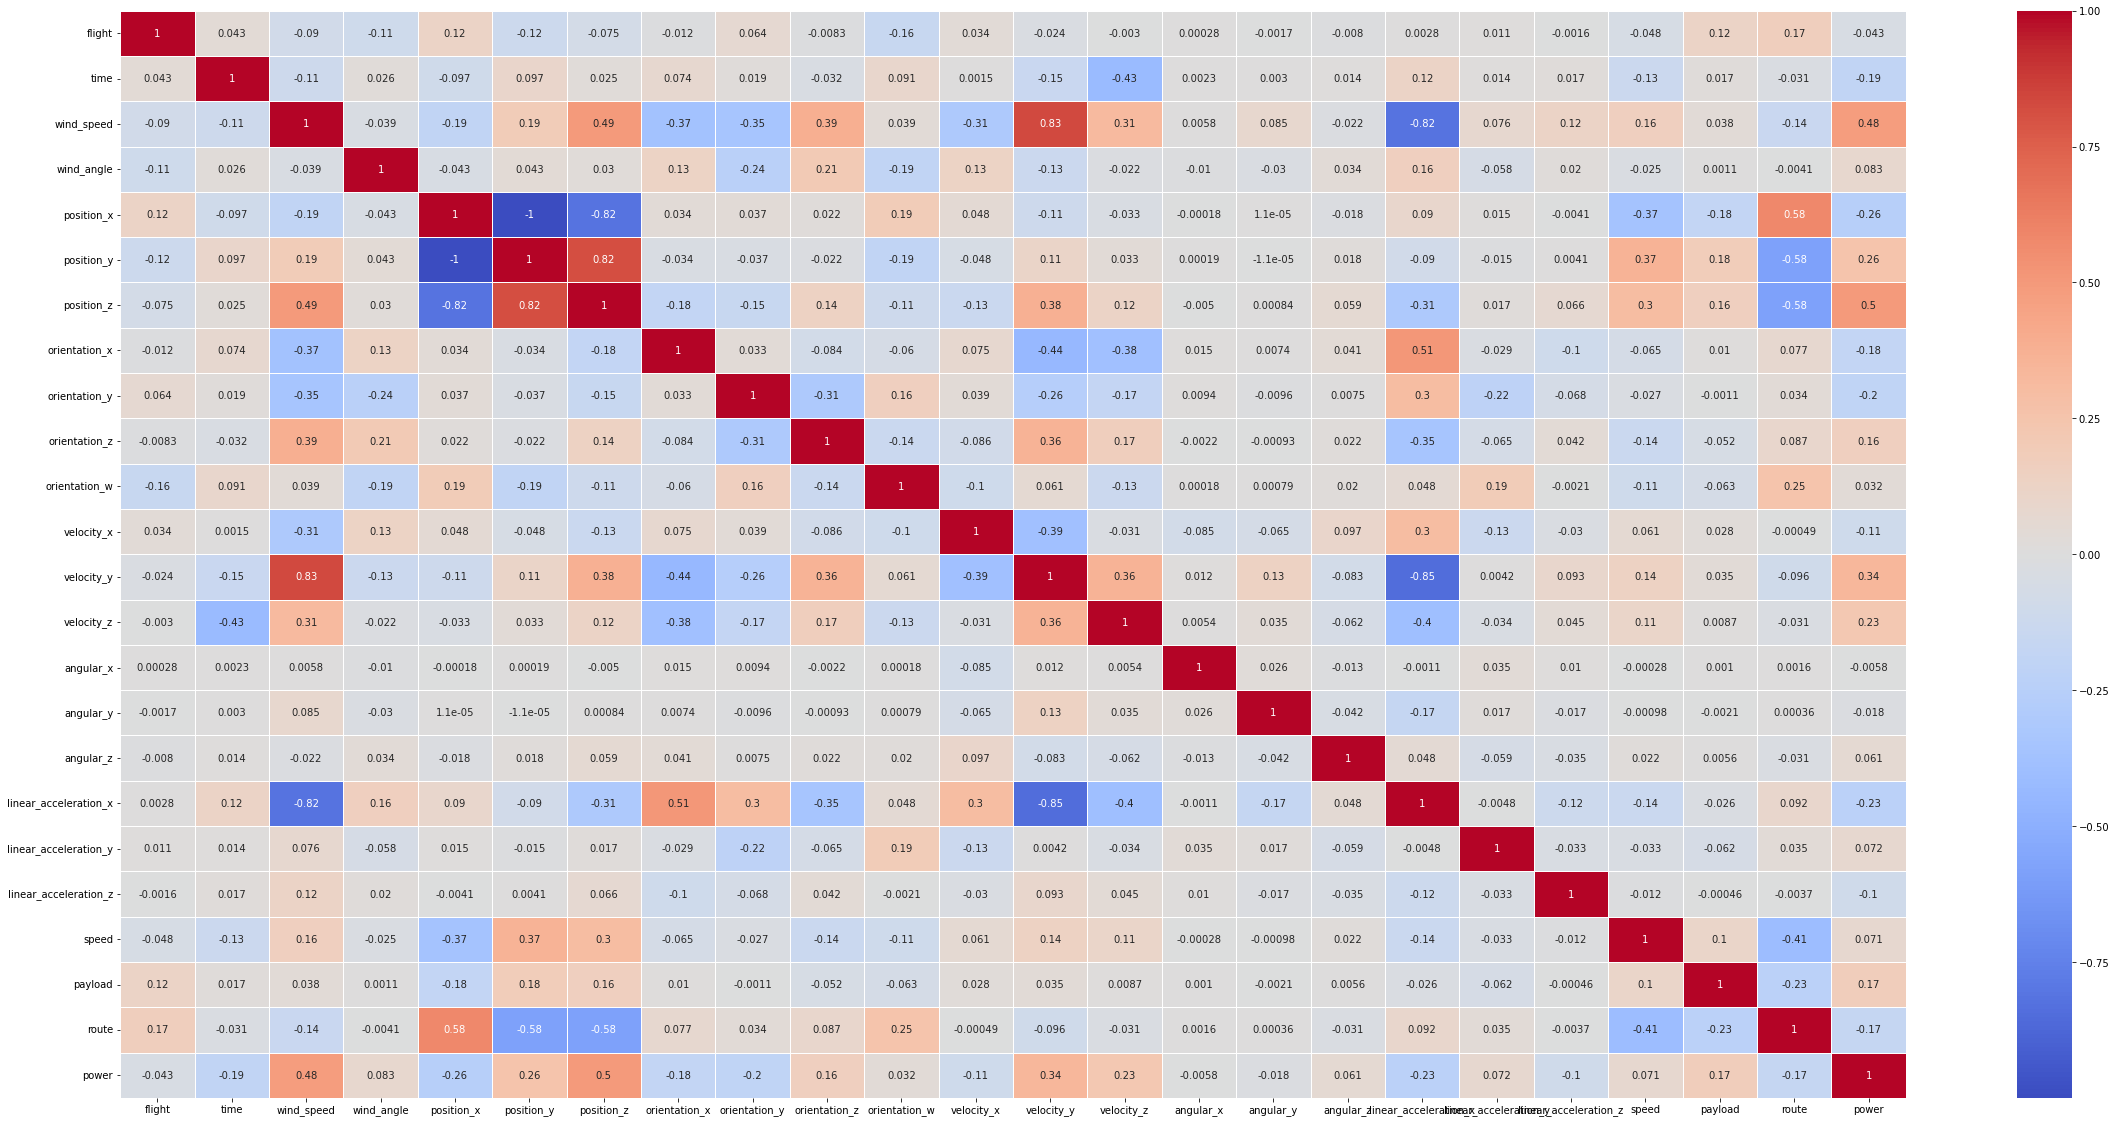

In [27]:
plt.figure(figsize = (40,20)) # Create matplotlib figure
sns.heatmap(data.corr(), annot = True, linewidths=1, fmt=".2g", cmap= 'coolwarm') 
# fmt = .1e (scientific notation), .2f (2 decimal places), .3g(3 significant figures), .2%(percentage with 2 decimal places)
plt.xticks(rotation='horizontal')
     

In [28]:
data = data.set_index("datetime")
data
     

,flight,time,wind_speed,wind_angle,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,date,time_day,route,power
datetime,,,,,,,,,,,,,,,,,,,,,
2019-04-07 10:13:00,1,0.00,0.1,12.0,-79.782396,40.458047,269.332402,0.001772,0.005610,-0.255526,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,2019-04-07,0 days 10:13:00,5,2.118702
2019-04-07 10:13:00,1,0.20,0.1,3.0,-79.782396,40.458047,269.332056,0.001768,0.005607,-0.255530,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,2019-04-07,0 days 10:13:00,5,2.311789
2019-04-07 10:13:00,1,0.30,0.1,352.0,-79.782396,40.458047,269.333081,0.001768,0.005607,-0.255530,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,2019-04-07,0 days 10:13:00,5,2.311669
2019-04-07 10:13:00,1,0.50,0.1,354.0,-79.782396,40.458047,269.334648,0.001775,0.005614,-0.255524,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,2019-04-07,0 days 10:13:00,5,2.311550
2019-04-07 10:13:00,1,0.60,0.1,359.0,-79.782396,40.458047,269.336178,0.001775,0.005614,-0.255524,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,2019-04-07,0 days 10:13:00,5,1.925196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-24 10:10:00,279,152.10,1.1,198.0,-79.782802,40.459018,271.560190,0.021382,0.012706,-0.008266,...,0.009449,0.444553,-0.274965,-9.796700,10.0,0.0,2019-10-24,0 days 10:10:00,7,2.181086
2019-10-24 10:10:00,279,152.20,1.1,196.0,-79.782802,40.459018,271.571983,0.021383,0.012719,-0.008377,...,-0.001755,0.451230,-0.240619,-9.793810,10.0,0.0,2019-10-24,0 days 10:10:00,7,2.180130
2019-10-24 10:10:00,279,152.41,1.2,189.0,-79.782802,40.459018,271.584533,0.021385,0.012687,-0.008571,...,0.008545,0.443839,-0.274903,-9.796004,10.0,0.0,2019-10-24,0 days 10:10:00,7,2.544461


In [29]:
df_weekly = data['power'].resample('W').mean()
df_feature1= data["position_z"].resample("W").mean()
df_feature2 = data["wind_speed"].resample("W").mean()
df_feature3 = data["velocity_y"].resample("W").mean()

C:\Users\THOMAS\AppData\Local\Temp/ipykernel_15364/1920412851.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


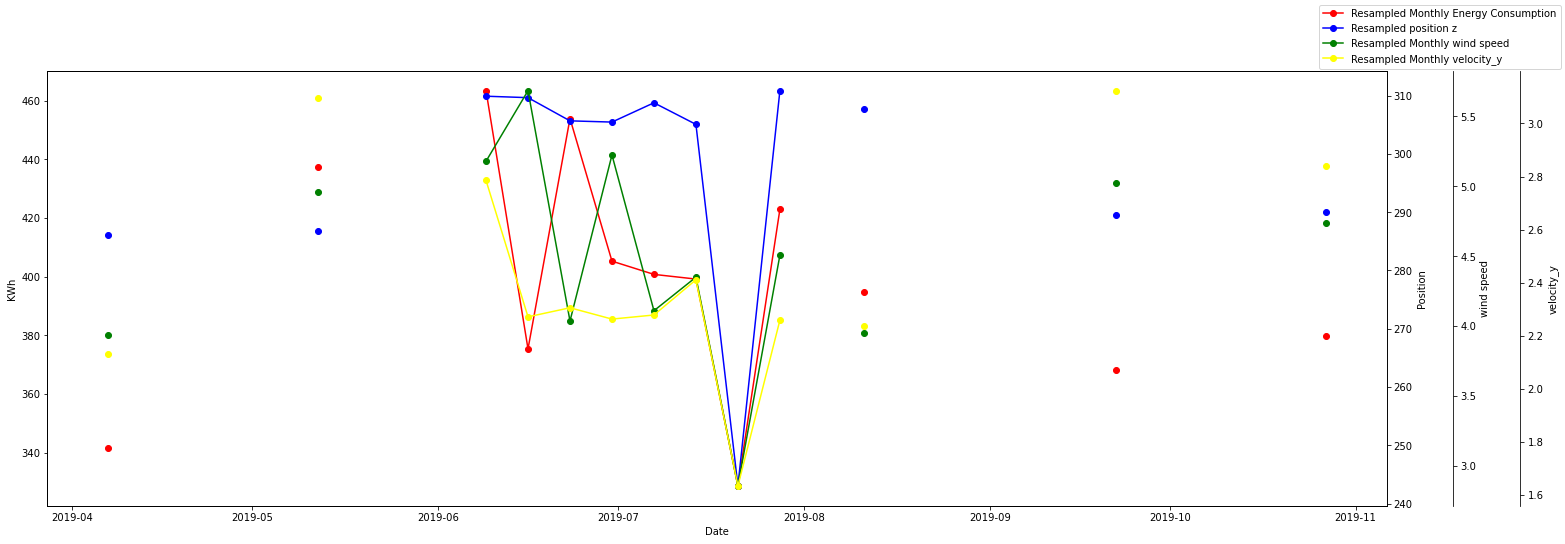

In [30]:
fig,ax = plt.subplots(figsize=(24,8))  # Create matplotlib figure
ax.plot(df_weekly.index, df_weekly, color="red",marker="o")
ax.set_ylabel("KWh")
ax.set_xlabel('Date')
ax2 = ax.twinx()
ax3 = ax.twinx()

ax4 = ax.twinx()

ax2.plot(df_weekly.index, df_feature1, color="blue", marker="o")
ax2.set_ylabel("Position")
ax3.plot(df_weekly.index, df_feature2, color="green", marker="o")
ax3.set_ylabel("wind speed")
ax3.spines["right"].set_position(("axes", 1.05))

ax4.plot(df_weekly.index, df_feature3, color="yellow", marker="o")
ax4.set_ylabel("velocity_y")
ax4.spines["right"].set_position(("axes", 1.10))

fig.legend(["Resampled Monthly Energy Consumption","Resampled position z","Resampled Monthly wind speed","Resampled Monthly velocity_y" ], loc='upper right')
fig.show()

In [31]:
df_monthly = data['power'].resample('M').mean()
df_feature1= data["position_z"].resample("M").mean()
df_feature2 = data["wind_speed"].resample("M").mean()
df_feature3 = data["velocity_y"].resample("M").mean()

C:\Users\THOMAS\AppData\Local\Temp/ipykernel_15364/501913399.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


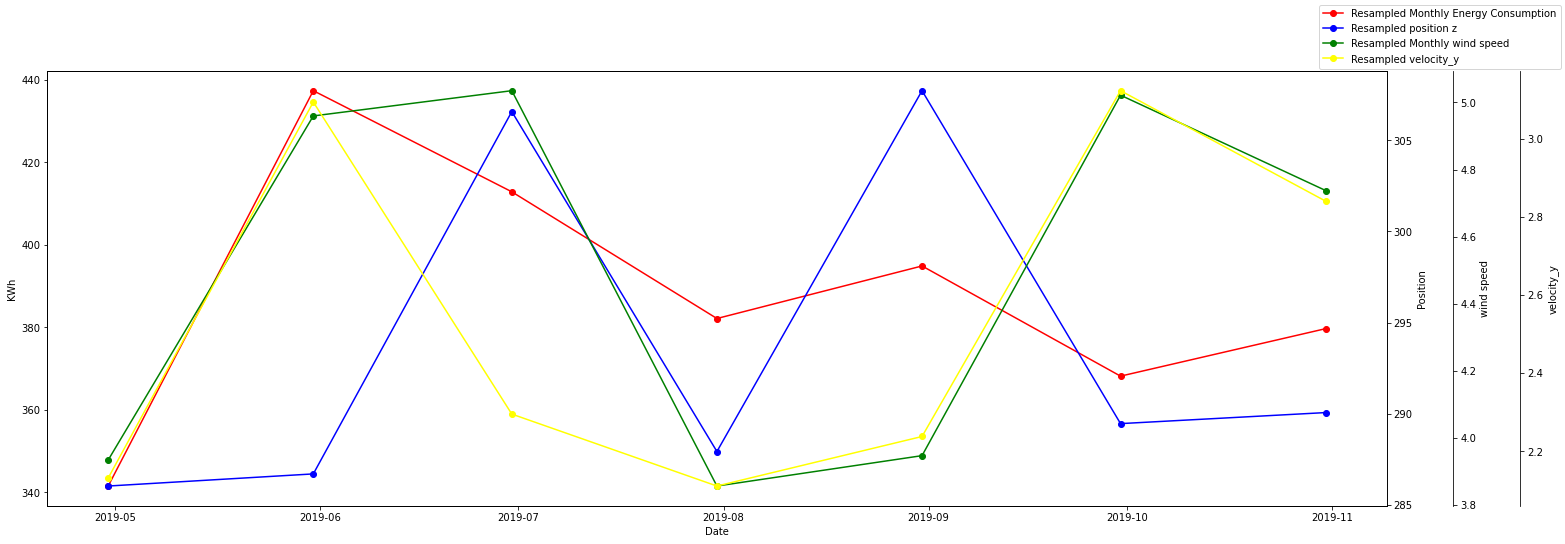

In [32]:
fig,ax = plt.subplots(figsize=(24,8))  # Create matplotlib figure
ax.plot(df_monthly.index, df_monthly, color="red",marker="o")
ax.set_ylabel("KWh")
ax.set_xlabel('Date')
ax2 = ax.twinx()
ax3 = ax.twinx()

ax4 = ax.twinx()

ax2.plot(df_monthly.index, df_feature1, color="blue", marker="o")
ax2.set_ylabel("Position")
ax3.plot(df_monthly.index, df_feature2, color="green", marker="o")
ax3.set_ylabel("wind speed")
ax3.spines["right"].set_position(("axes", 1.05))

ax4.plot(df_monthly.index, df_feature3, color="yellow", marker="o")
ax4.set_ylabel("velocity_y")
ax4.spines["right"].set_position(("axes", 1.10))

fig.legend(["Resampled Monthly Energy Consumption","Resampled position z","Resampled Monthly wind speed","Resampled velocity_y" ], loc='upper right')
fig.show()

In [33]:
df_monthly

datetime
2019-04-30    341.530630
2019-05-31    437.349388
2019-06-30    412.844330
2019-07-31    382.131576
2019-08-31    394.866800
2019-09-30    368.165680
2019-10-31    379.672219
Freq: M, Name: power, dtype: float64

In [34]:
data.drop('date', axis=1, inplace=True)
data.drop('time_day', axis=1, inplace=True)
data.drop('route', axis=1, inplace=True)         

In [35]:
data

,flight,time,wind_speed,wind_angle,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,...,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,power
datetime,,,,,,,,,,,,,,,,,,,,,
2019-04-07 10:13:00,1,0.00,0.1,12.0,-79.782396,40.458047,269.332402,0.001772,0.005610,-0.255526,...,0.010475,-0.000825,0.001407,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,2.118702
2019-04-07 10:13:00,1,0.20,0.1,3.0,-79.782396,40.458047,269.332056,0.001768,0.005607,-0.255530,...,0.010137,0.000001,-0.002862,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,2.311789
2019-04-07 10:13:00,1,0.30,0.1,352.0,-79.782396,40.458047,269.333081,0.001768,0.005607,-0.255530,...,0.009981,-0.000007,-0.001486,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,2.311669
2019-04-07 10:13:00,1,0.50,0.1,354.0,-79.782396,40.458047,269.334648,0.001775,0.005614,-0.255524,...,0.015091,0.001255,-0.000347,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,2.311550
2019-04-07 10:13:00,1,0.60,0.1,359.0,-79.782396,40.458047,269.336178,0.001775,0.005614,-0.255524,...,0.015142,-0.002383,0.000182,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,1.925196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-24 10:10:00,279,152.10,1.1,198.0,-79.782802,40.459018,271.560190,0.021382,0.012706,-0.008266,...,0.016158,0.005570,-0.005112,0.009449,0.444553,-0.274965,-9.796700,10.0,0.0,2.181086
2019-10-24 10:10:00,279,152.20,1.1,196.0,-79.782802,40.459018,271.571983,0.021383,0.012719,-0.008377,...,0.018405,0.001565,0.001721,-0.001755,0.451230,-0.240619,-9.793810,10.0,0.0,2.180130
2019-10-24 10:10:00,279,152.41,1.2,189.0,-79.782802,40.459018,271.584533,0.021385,0.012687,-0.008571,...,0.015923,0.008084,-0.002138,0.008545,0.443839,-0.274903,-9.796004,10.0,0.0,2.544461


In [36]:
from sklearn.svm import SVR

In [37]:
Y = data[['power']].copy()
Y

,power
datetime,
2019-04-07 10:13:00,2.118702
2019-04-07 10:13:00,2.311789
2019-04-07 10:13:00,2.311669
2019-04-07 10:13:00,2.311550
2019-04-07 10:13:00,1.925196
...,...
2019-10-24 10:10:00,2.181086
2019-10-24 10:10:00,2.180130
2019-10-24 10:10:00,2.544461


In [38]:
##data.drop('power', axis=1, inplace=True)

In [39]:
columns_to_keep = ['position_z', 'wind_speed', 'velocity_y']


df = data[columns_to_keep]

In [40]:
df

,position_z,wind_speed,velocity_y
datetime,,,
2019-04-07 10:13:00,269.332402,0.1,-0.005645
2019-04-07 10:13:00,269.332056,0.1,-0.001636
2019-04-07 10:13:00,269.333081,0.1,-0.001822
2019-04-07 10:13:00,269.334648,0.1,-0.005263
2019-04-07 10:13:00,269.336178,0.1,-0.005174
...,...,...,...
2019-10-24 10:10:00,271.560190,1.1,0.019701
2019-10-24 10:10:00,271.571983,1.1,0.015486
2019-10-24 10:10:00,271.584533,1.2,0.018265


In [41]:
#Splitting the data into training (80%) and testing (20%) set
##from sklearn.model_selection import train_test_split
##X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size = 0.2, random_state = 0)

In [42]:
##y_train = y_train.values.ravel()
##y_test = y_test.values.ravel()

In [43]:
def models(X_train,y_train,X_test, y_test):
    regr = SVR(kernel='rbf')
    regr= regr.fit(X_train, y_train)
    # fitting the regression model to the training data
    regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
    
    print('Predicting on the training data')
    predict_train= regr.predict(X_train)
    print('Model accuracy: ')
    print(r2_score(y_train, predict_train))
    print('Mean squared error: ')
    print(mean_squared_error(y_train, predict_train))
    
    print()
    print('Predicting on the test data')
    pred= regr.predict(X_test)
    print('Model accuracy: ')
    
    print(r2_score(y_test, pred))
    print()
    print('Mean squared error: ')
    print(mean_squared_error(y_test, pred))
    
    
    plt.figure(figsize = (20,5))
    plt.plot(y_test, label="Original")
    plt.plot(pred, label="Predicted")
    plt.legend(loc='best')
    plt.xlabel('Time (Hours)')
    plt.ylabel('kWh')
    return regr
     

In [44]:
import timeit

In [45]:
##%%time
##models(X_train,y_train,X_test, y_test)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [47]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()

In [48]:
from sklearn.preprocessing import RobustScaler
robscaler = RobustScaler()

In [49]:
df_stscaler = pd.DataFrame(stscaler.fit_transform(data), columns=data.columns)
Ystscaler = df_stscaler[['power']].copy()
df_stscaler

,flight,time,wind_speed,wind_angle,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,...,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,power
0,-2.259721,-1.560095,-1.212711,-1.556407,-0.160604,0.160710,-0.454166,0.250310,0.357336,-0.213777,...,-0.195948,0.003399,0.007323,-0.087184,0.416439,-0.298437,-0.033429,-1.036165,-1.139869,-1.653455
1,-2.259721,-1.556904,-1.212711,-1.645361,-0.160604,0.160710,-0.454172,0.250211,0.357273,-0.213783,...,-0.196180,0.010480,-0.016980,-0.106222,0.418921,-0.289740,-0.031818,-1.036165,-1.139869,-1.652639
2,-2.259721,-1.555308,-1.212711,1.804080,-0.160604,0.160710,-0.454155,0.250211,0.357273,-0.213783,...,-0.196286,0.010407,-0.009146,-0.117800,0.414417,-0.316200,-0.029759,-1.036165,-1.139869,-1.652640
3,-2.259721,-1.552117,-1.212711,1.823847,-0.160604,0.160710,-0.454128,0.250367,0.357440,-0.213774,...,-0.192786,0.021224,-0.002666,-0.104591,0.413546,-0.315504,-0.031315,-1.036165,-1.139869,-1.652640
4,-2.259721,-1.550521,-1.212711,1.873266,-0.160604,0.160710,-0.454101,0.250367,0.357440,-0.213774,...,-0.192751,-0.009952,0.000346,-0.139899,0.421635,-0.297319,-0.035567,-1.036165,-1.139869,-1.654273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257891,1.631390,0.867008,-0.926559,0.281977,-0.160637,0.160863,-0.415958,0.663907,0.514444,0.127665,...,-0.192055,0.058193,-0.029787,-0.076698,0.986569,-0.633794,-0.002201,0.833542,-1.139869,-1.653192
257892,1.631390,0.868604,-0.926559,0.262209,-0.160637,0.160863,-0.415755,0.663910,0.514727,0.127511,...,-0.190515,0.023881,0.009110,-0.121306,0.995215,-0.559272,0.004050,0.833542,-1.139869,-1.653196
257893,1.631390,0.871955,-0.897944,0.193023,-0.160637,0.160863,-0.415540,0.663959,0.514028,0.127244,...,-0.192216,0.079735,-0.012857,-0.080299,0.985644,-0.633659,-0.000696,0.833542,-1.139869,-1.651656
257894,1.631390,0.874987,-0.926559,0.173255,-0.160637,0.160863,-0.415480,0.664132,0.513678,0.126981,...,-0.191811,-0.075144,-0.003186,-0.119809,0.985698,-0.576229,0.002120,0.833542,-1.139869,-1.650121


In [50]:
df_robscaler = pd.DataFrame(robscaler.fit_transform(data), columns=data.columns)
Yrobscaler = df_robscaler[['power']].copy()
df_robscaler

,flight,time,wind_speed,wind_angle,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,...,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,power
0,-1.486486,-0.976891,-0.64,-1.006098,0.665282,-5.277534,-0.422508,0.107304,0.278589,-0.095983,...,-0.018476,-0.006021,0.016925,0.062020,0.065473,-0.304830,-0.042958,-0.666667,-0.5,-1.239614
1,-1.486486,-0.974790,-0.64,-1.060976,0.664960,-5.277255,-0.422515,0.107167,0.278506,-0.095986,...,-0.018816,0.003771,-0.037123,0.010123,0.067675,-0.295523,-0.039780,-0.666667,-0.5,-1.239116
2,-1.486486,-0.973739,-0.64,1.067073,0.664922,-5.277199,-0.422496,0.107167,0.278506,-0.095986,...,-0.018973,0.003669,-0.019700,-0.021437,0.063680,-0.323839,-0.035718,-0.666667,-0.5,-1.239117
3,-1.486486,-0.971639,-0.64,1.079268,0.664657,-5.277143,-0.422466,0.107383,0.278725,-0.095981,...,-0.013833,0.018629,-0.005289,0.014569,0.062908,-0.323095,-0.038787,-0.666667,-0.5,-1.239117
4,-1.486486,-0.970588,-0.64,1.109756,0.664638,-5.277143,-0.422438,0.107383,0.278725,-0.095981,...,-0.013781,-0.024485,0.001409,-0.081678,0.070083,-0.303633,-0.047175,-0.666667,-0.5,-1.240112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257891,1.018018,0.620798,-0.44,0.128049,-0.103635,0.135647,-0.381202,0.678721,0.485508,0.068877,...,-0.012759,0.069754,-0.065604,0.090605,0.571207,-0.663716,0.018646,0.333333,-0.5,-1.239453
257892,1.018018,0.621849,-0.44,0.115854,-0.104016,0.135391,-0.380984,0.678725,0.485880,0.068802,...,-0.010499,0.022303,0.020899,-0.030995,0.578877,-0.583966,0.030977,0.333333,-0.5,-1.239455
257893,1.018018,0.624055,-0.42,0.073171,-0.104442,0.135294,-0.380751,0.678793,0.484960,0.068673,...,-0.012996,0.099544,-0.027953,0.080789,0.570387,-0.663573,0.021615,0.333333,-0.5,-1.238517
257894,1.018018,0.626050,-0.44,0.060976,-0.104519,0.135495,-0.380686,0.679032,0.484499,0.068546,...,-0.012401,-0.114640,-0.006446,-0.026913,0.570434,-0.602112,0.027169,0.333333,-0.5,-1.237581


In [51]:
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
Yminmax = df_normalized[['power']].copy()
df_normalized

,flight,time,wind_speed,wind_angle,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,...,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,power
0,0.0,0.000000,0.005525,0.033426,0.002053,0.999960,0.715950,0.570210,0.348105,0.372237,...,0.408409,0.429761,0.564842,0.462624,0.559327,0.553156,0.682850,0.333333,0.0,0.010330
1,0.0,0.000467,0.005525,0.008357,0.002053,0.999960,0.715949,0.570205,0.348102,0.372235,...,0.408375,0.429917,0.564187,0.461438,0.559509,0.553402,0.682889,0.333333,0.0,0.010521
2,0.0,0.000700,0.005525,0.980501,0.002053,0.999960,0.715952,0.570205,0.348102,0.372235,...,0.408359,0.429915,0.564398,0.460716,0.559179,0.552652,0.682940,0.333333,0.0,0.010521
3,0.0,0.001167,0.005525,0.986072,0.002053,0.999960,0.715956,0.570213,0.348111,0.372238,...,0.408877,0.430153,0.564573,0.461540,0.559115,0.552672,0.682902,0.333333,0.0,0.010521
4,0.0,0.001401,0.005525,1.000000,0.002053,0.999960,0.715960,0.570213,0.348111,0.372238,...,0.408882,0.429467,0.564654,0.459339,0.559708,0.553187,0.682797,0.333333,0.0,0.010139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257891,1.0,0.355133,0.060773,0.551532,0.002048,0.999984,0.721872,0.590608,0.356779,0.495868,...,0.408985,0.430967,0.563841,0.463278,0.601112,0.543643,0.683615,0.833333,0.0,0.010392
257892,1.0,0.355367,0.060773,0.545961,0.002048,0.999984,0.721904,0.590608,0.356795,0.495812,...,0.409213,0.430212,0.564891,0.460498,0.601746,0.545757,0.683769,0.833333,0.0,0.010391
257893,1.0,0.355857,0.066298,0.526462,0.002048,0.999984,0.721937,0.590610,0.356756,0.495715,...,0.408962,0.431441,0.564298,0.463054,0.601044,0.543647,0.683652,0.833333,0.0,0.010751
257894,1.0,0.356301,0.060773,0.520891,0.002048,0.999984,0.721946,0.590619,0.356737,0.495620,...,0.409021,0.428032,0.564559,0.460591,0.601048,0.545276,0.683721,0.833333,0.0,0.011110


We then do all the above with normalized data

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0.5, 0, 'flight'),
  Text(1.5, 0, 'time'),
  Text(2.5, 0, 'wind_speed'),
  Text(3.5, 0, 'wind_angle'),
  Text(4.5, 0, 'position_x'),
  Text(5.5, 0, 'position_y'),
  Text(6.5, 0, 'position_z'),
  Text(7.5, 0, 'orientation_x'),
  Text(8.5, 0, 'orientation_y'),
  Text(9.5, 0, 'orientation_z'),
  Text(10.5, 0, 'orientation_w'),
  Text(11.5, 0, 'velocity_x'),
  Text(12.5, 0, 'velocity_y'),
  Text(13.5, 0, 'velocity_z'),
  Text(14.5, 0, 'angular_x'),
  Text(15.5, 0, 'angular_y'),
  Text(16.5, 0, 'angular_z'),
  Text(17.5, 0, 'linear_acceleration_x'),
  Text(18.5, 0, 'linear_acceleration_y'),
  Text(19.5, 0, 'linear_acceleration_z'),
  Text(20.5, 0, 'speed'),
  Text(21.5, 0, 'payload'),
  Text(22.5, 0, 'power')])

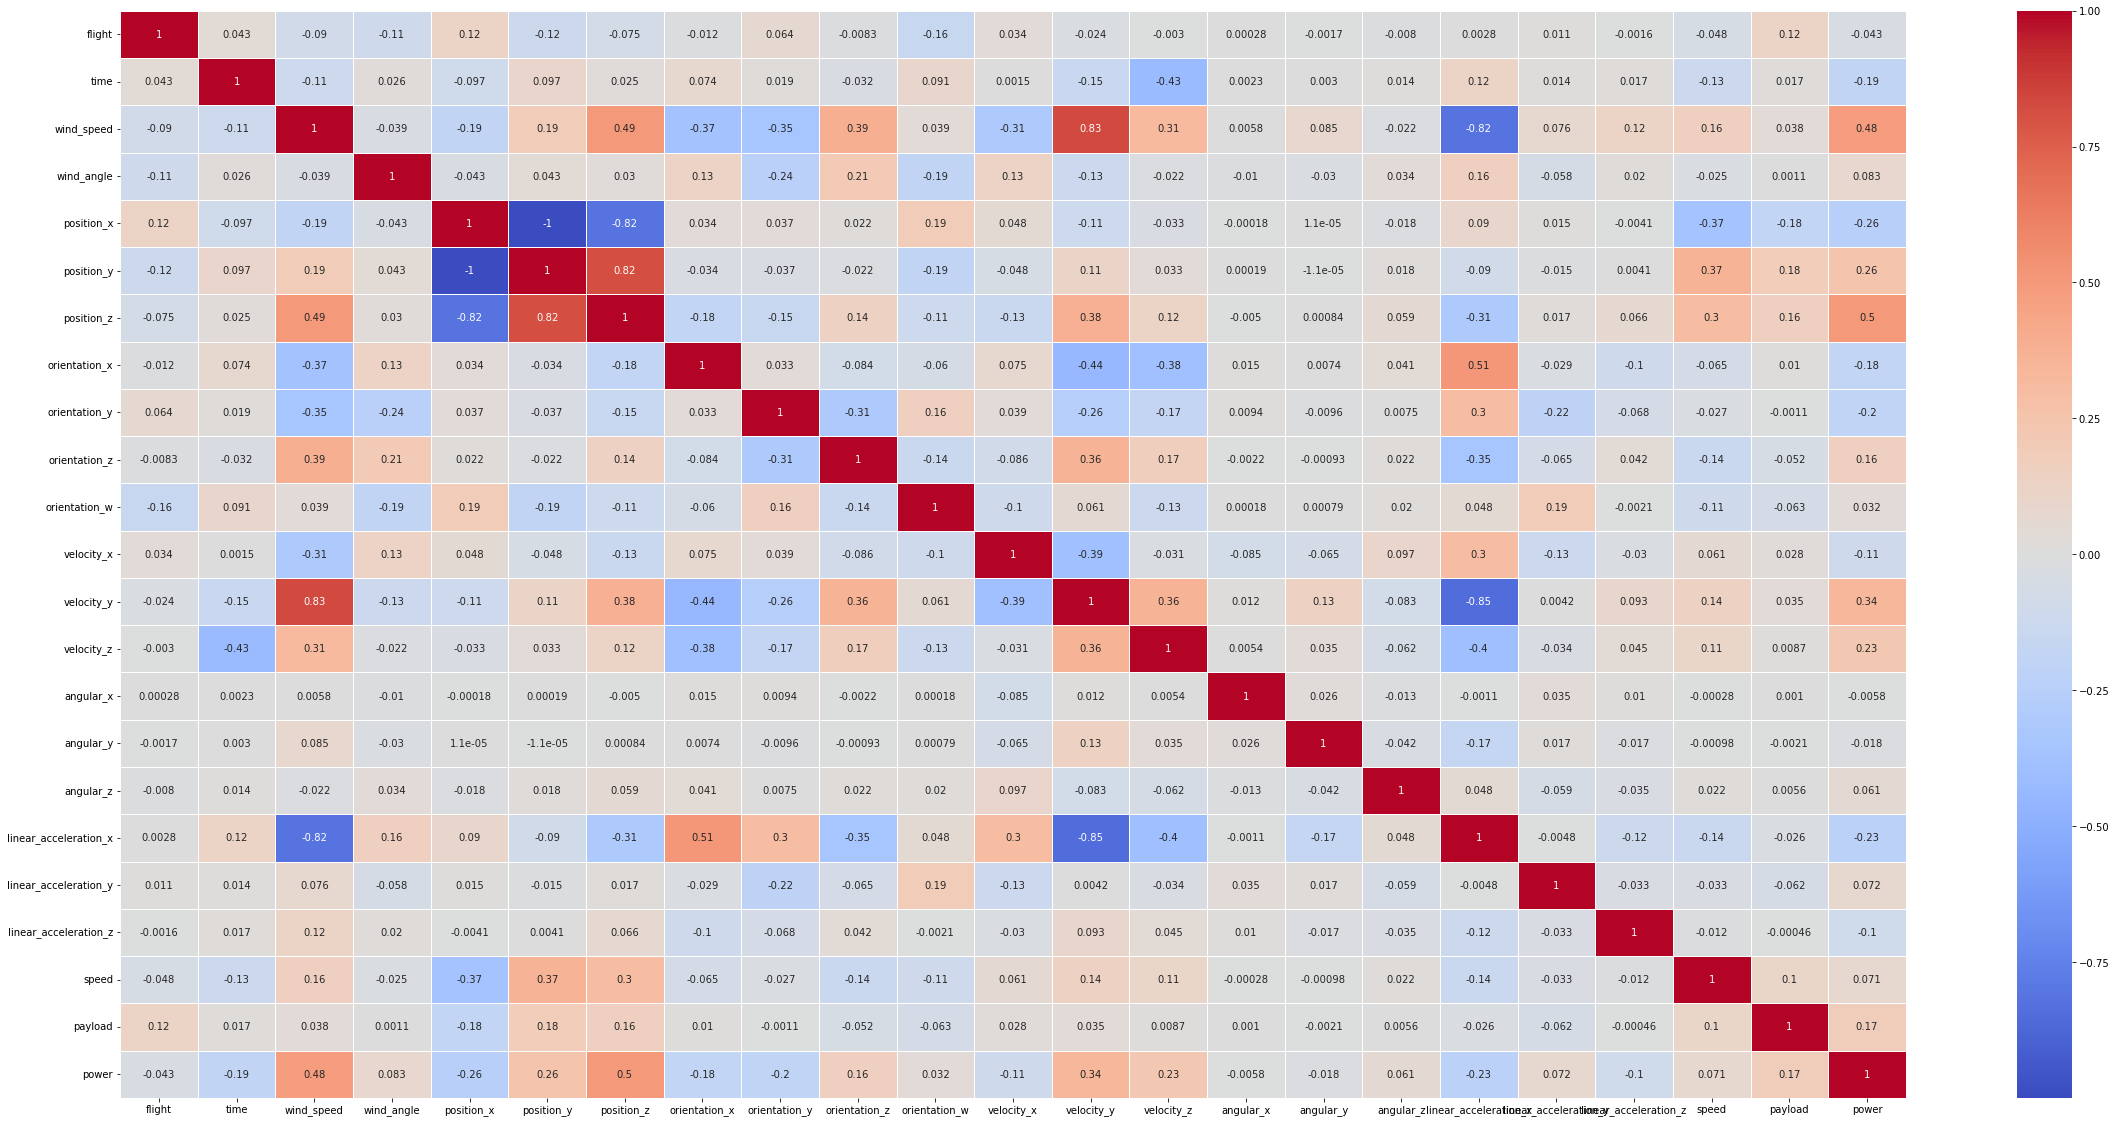

In [52]:
plt.figure(figsize = (40,20)) # Create matplotlib figure
sns.heatmap(df_normalized.corr(), annot = True, linewidths=1, fmt=".2g", cmap= 'coolwarm') 
# fmt = .1e (scientific notation), .2f (2 decimal places), .3g(3 significant figures), .2%(percentage with 2 decimal places)
plt.xticks(rotation='horizontal')

In [53]:
df_normalized.set_index(data.index, inplace=True)

In [54]:
df_monthly = df_normalized['power'].resample('M').mean()
df_feature1= df_normalized["position_z"].resample("M").mean()
df_feature2= df_normalized["wind_speed"].resample("M").mean()
df_feature3= df_normalized["velocity_y"].resample("M").mean()

C:\Users\THOMAS\AppData\Local\Temp/ipykernel_15284/370741854.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


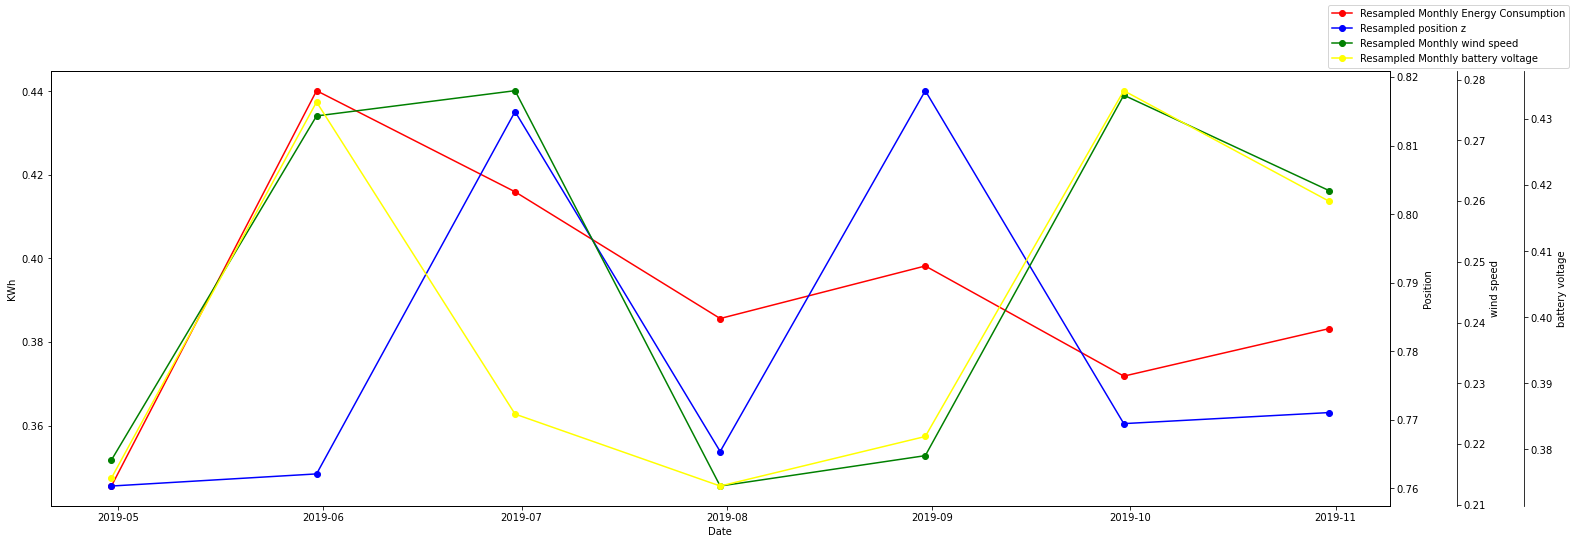

In [55]:
fig,ax = plt.subplots(figsize=(24,8))  # Create matplotlib figure
ax.plot(df_monthly.index, df_monthly, color="red",marker="o")
ax.set_ylabel("KWh")
ax.set_xlabel('Date')
ax2 = ax.twinx()
ax3 = ax.twinx()

ax4 = ax.twinx()

ax2.plot(df_monthly.index, df_feature1, color="blue", marker="o")
ax2.set_ylabel("Position")
ax3.plot(df_monthly.index, df_feature2, color="green", marker="o")
ax3.set_ylabel("wind speed")
ax3.spines["right"].set_position(("axes", 1.05))

ax4.plot(df_monthly.index, df_feature3, color="yellow", marker="o")
ax4.set_ylabel("battery voltage")
ax4.spines["right"].set_position(("axes", 1.10))

fig.legend(["Resampled Monthly Energy Consumption","Resampled position z","Resampled Monthly wind speed","Resampled Monthly battery voltage" ], loc='upper right')
fig.show()

In [56]:
##Y = df_normalized[['power']].copy()
Y

,power
datetime,
2019-04-07 10:13:00,2.118702
2019-04-07 10:13:00,2.311789
2019-04-07 10:13:00,2.311669
2019-04-07 10:13:00,2.311550
2019-04-07 10:13:00,1.925196
...,...
2019-10-24 10:10:00,2.181086
2019-10-24 10:10:00,2.180130
2019-10-24 10:10:00,2.544461


In [57]:
df_normalized.drop('power', axis=1, inplace=True)

In [58]:
df_normalized

,flight,time,wind_speed,wind_angle,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,...,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload
datetime,,,,,,,,,,,,,,,,,,,,,
2019-04-07 10:13:00,0.0,0.000000,0.005525,0.033426,0.002053,0.999960,0.715950,0.570210,0.348105,0.372237,...,0.249494,0.408409,0.429761,0.564842,0.462624,0.559327,0.553156,0.682850,0.333333,0.0
2019-04-07 10:13:00,0.0,0.000467,0.005525,0.008357,0.002053,0.999960,0.715949,0.570205,0.348102,0.372235,...,0.249731,0.408375,0.429917,0.564187,0.461438,0.559509,0.553402,0.682889,0.333333,0.0
2019-04-07 10:13:00,0.0,0.000700,0.005525,0.980501,0.002053,0.999960,0.715952,0.570205,0.348102,0.372235,...,0.249720,0.408359,0.429915,0.564398,0.460716,0.559179,0.552652,0.682940,0.333333,0.0
2019-04-07 10:13:00,0.0,0.001167,0.005525,0.986072,0.002053,0.999960,0.715956,0.570213,0.348111,0.372238,...,0.249517,0.408877,0.430153,0.564573,0.461540,0.559115,0.552672,0.682902,0.333333,0.0
2019-04-07 10:13:00,0.0,0.001401,0.005525,1.000000,0.002053,0.999960,0.715960,0.570213,0.348111,0.372238,...,0.249522,0.408882,0.429467,0.564654,0.459339,0.559708,0.553187,0.682797,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-24 10:10:00,1.0,0.355133,0.060773,0.551532,0.002048,0.999984,0.721872,0.590608,0.356779,0.495868,...,0.250991,0.408985,0.430967,0.563841,0.463278,0.601112,0.543643,0.683615,0.833333,0.0
2019-10-24 10:10:00,1.0,0.355367,0.060773,0.545961,0.002048,0.999984,0.721904,0.590608,0.356795,0.495812,...,0.250742,0.409213,0.430212,0.564891,0.460498,0.601746,0.545757,0.683769,0.833333,0.0
2019-10-24 10:10:00,1.0,0.355857,0.066298,0.526462,0.002048,0.999984,0.721937,0.590610,0.356756,0.495715,...,0.250906,0.408962,0.431441,0.564298,0.463054,0.601044,0.543647,0.683652,0.833333,0.0


In [59]:
#Splitting the data into training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_normalized, Yminmax, test_size = 0.2, random_state = 0)

In [60]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [61]:
from sklearn.svm import SVR

In [62]:
##columns_to_keep = ['position_z', 'wind_speed', 'velocity_y']


##df_normalized = df_normalized[columns_to_keep]

In [63]:
df_normalized

,flight,time,wind_speed,wind_angle,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,...,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload
datetime,,,,,,,,,,,,,,,,,,,,,
2019-04-07 10:13:00,0.0,0.000000,0.005525,0.033426,0.002053,0.999960,0.715950,0.570210,0.348105,0.372237,...,0.249494,0.408409,0.429761,0.564842,0.462624,0.559327,0.553156,0.682850,0.333333,0.0
2019-04-07 10:13:00,0.0,0.000467,0.005525,0.008357,0.002053,0.999960,0.715949,0.570205,0.348102,0.372235,...,0.249731,0.408375,0.429917,0.564187,0.461438,0.559509,0.553402,0.682889,0.333333,0.0
2019-04-07 10:13:00,0.0,0.000700,0.005525,0.980501,0.002053,0.999960,0.715952,0.570205,0.348102,0.372235,...,0.249720,0.408359,0.429915,0.564398,0.460716,0.559179,0.552652,0.682940,0.333333,0.0
2019-04-07 10:13:00,0.0,0.001167,0.005525,0.986072,0.002053,0.999960,0.715956,0.570213,0.348111,0.372238,...,0.249517,0.408877,0.430153,0.564573,0.461540,0.559115,0.552672,0.682902,0.333333,0.0
2019-04-07 10:13:00,0.0,0.001401,0.005525,1.000000,0.002053,0.999960,0.715960,0.570213,0.348111,0.372238,...,0.249522,0.408882,0.429467,0.564654,0.459339,0.559708,0.553187,0.682797,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-24 10:10:00,1.0,0.355133,0.060773,0.551532,0.002048,0.999984,0.721872,0.590608,0.356779,0.495868,...,0.250991,0.408985,0.430967,0.563841,0.463278,0.601112,0.543643,0.683615,0.833333,0.0
2019-10-24 10:10:00,1.0,0.355367,0.060773,0.545961,0.002048,0.999984,0.721904,0.590608,0.356795,0.495812,...,0.250742,0.409213,0.430212,0.564891,0.460498,0.601746,0.545757,0.683769,0.833333,0.0
2019-10-24 10:10:00,1.0,0.355857,0.066298,0.526462,0.002048,0.999984,0.721937,0.590610,0.356756,0.495715,...,0.250906,0.408962,0.431441,0.564298,0.463054,0.601044,0.543647,0.683652,0.833333,0.0


Predicting on the training data
Model accuracy: 
0.8778191405666543
Mean squared error: 
0.006663280295944568

Predicting on the test data
Model accuracy: 
0.8770960220348009

Mean squared error: 
0.006755395001490579


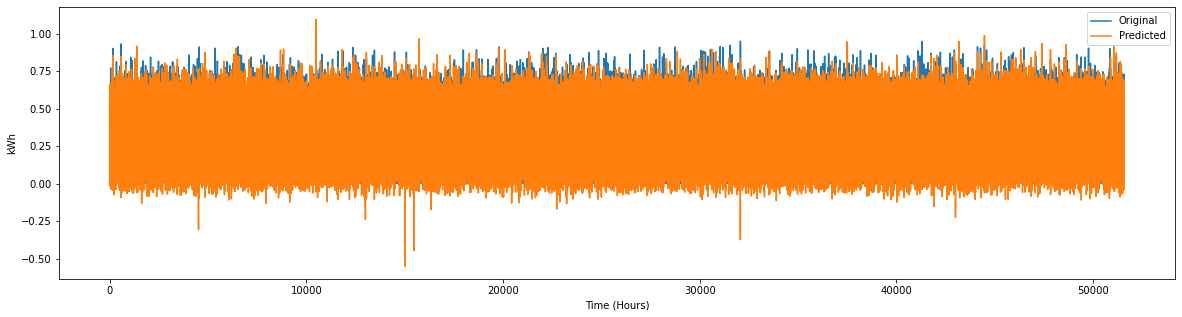

In [64]:
regr=models(X_train,y_train,X_test, y_test)

In [65]:
# regr = SVR(kernel='rbf')
# regr= regr.fit(X_train, y_train)
#     # fitting the regression model to the training data
# regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
    
# print('Predicting on the training data')
# predict_train= regr.predict(X_train)
# print('Model accuracy: ')
# print(r2_score(y_train, predict_train))
# print('Mean squared error: ')
# print(mean_squared_error(y_train, predict_train))
    
# print()
# print('Predicting on the test data')
# pred= regr.predict(X_test)
# print('Model accuracy: ')
    
# print(r2_score(y_test, pred))
# print()
# print('Mean squared error: ')
# print(mean_squared_error(y_test, pred))

In [66]:
# %%time

# #settings for hyperparameters
# check_parameters = {'C':[10,20,30], 'epsilon':[0.03, 0.5, 1], 'gamma':[5,6,7]}

# gridsearchcv = GridSearchCV(regr, check_parameters, n_jobs=-1, cv=3)
# gridsearchcv.fit(X_train, y_train)

# print('Best parameters found:\n', gridsearchcv.best_params_)
     

In [67]:
# We find best_svr result: C=30, epsilon=0.03, gamma=5. Considering these parameters, the model becomes as following:
Regr = SVR(kernel= 'rbf', C=30, epsilon = 0.03, gamma = 5) 

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8778191405666543
0.006663280295944568


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_normalized, Yminmax, test_size = 0.2, random_state = 0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [55]:

regr = SVR(kernel='linear')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train) 
# predicting on the training data
predict_train= regr.predict(X_train)
predict_test= regr.predict(X_test)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))
print(r2_score(y_test, predict_test))
print(mean_squared_error(y_test, predict_test))

0.951256462046075
0.0026582875379117894
0.9512445538269356
0.0026798343131434078


We try again with only three columns that are most related

In [73]:
columns_to_keep = ['position_z', 'wind_speed', 'velocity_y']


df_normalized_three = df_normalized[columns_to_keep]

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_normalized_three, Yminmax, test_size = 0.2, random_state = 0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

Predicting on the training data
Model accuracy: 
0.5960180104349833
Mean squared error: 
0.022031644264653125

Predicting on the test data
Model accuracy: 
0.5913419322591761

Mean squared error: 
0.02246181705295862
Wall time: 2h 3min 33s


SVR()

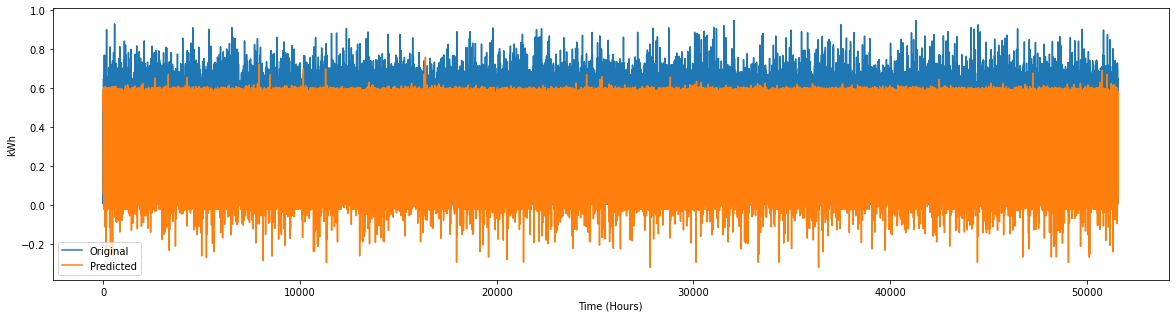

In [75]:
%%time
models(X_train,y_train,X_test, y_test)

In [76]:
columns_to_keep = ['position_z', 'wind_speed', 'velocity_y']


df_robscaler = df_robscaler[columns_to_keep]

In [77]:
#Splitting the data into training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_stscaler, Ystscaler, test_size = 0.2, random_state = 0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

Predicting on the training data
Model accuracy: 
0.9981907992147189
Mean squared error: 
0.0018063598756464432

Predicting on the test data
Model accuracy: 
0.9974116536041218

Mean squared error: 
0.0026045926392762515
Wall time: 9h 42min 7s


SVR()

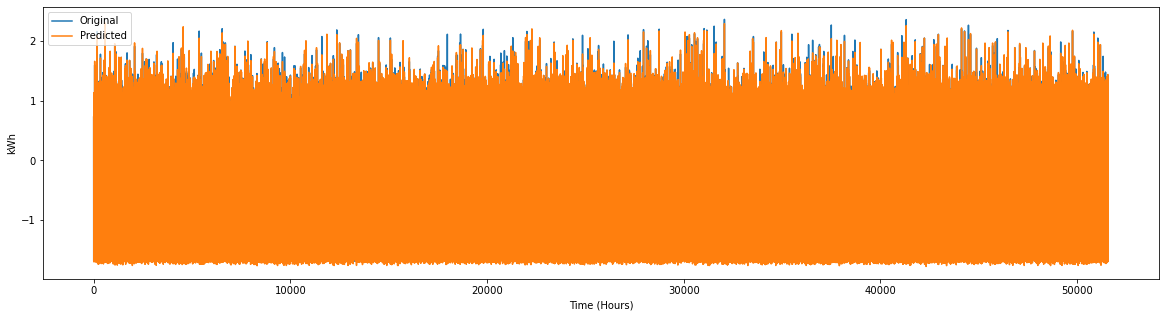

In [78]:
%%time
models(X_train,y_train,X_test, y_test)

In [51]:
#Splitting the data into training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_robscaler, Yrobscaler, test_size = 0.2, random_state = 0)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

Predicting on the training data
Model accuracy: 
-0.049771651720918575
Mean squared error: 
0.38965591883574674

Predicting on the test data
Model accuracy: 
-0.05168782752672385

Mean squared error: 
0.39343517526328387
Wall time: 6h 14min 30s


SVR()

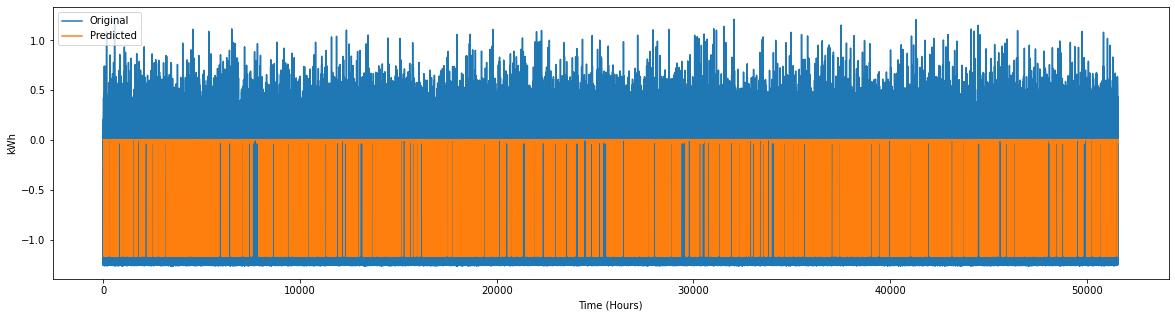

In [52]:
%%time
models(X_train,y_train,X_test, y_test)

In [ ]:
data.drop('power', axis=1, inplace=True)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
%%time
y_pred = regressor.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
df_normalized_three

In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized, Yminmax, test_size=0.2, random_state=42)

In [58]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [59]:
%%time
y_pred = regressor.predict(X_test)

Wall time: 14 ms


In [60]:
r2_score(y_test, y_pred)

1.0

In [67]:
print('Predicting on the training data')
y_pred_train = regressor.predict(X_train)
print('Model accuracy: ')
print(r2_score(y_train, y_pred_train))
print('Mean squared error: ')
print(mean_squared_error(y_train, y_pred_train))
    
print()
print('Predicting on the test data')
y_pred_test = regressor.predict(X_test)
print('Model accuracy: ')    
print(r2_score(y_test, y_pred_test))
print('Mean squared error: ')
print(mean_squared_error(y_test, y_pred_test))
   

Predicting on the training data
Model accuracy: 
1.0
Mean squared error: 
2.9844925651351705e-31

Predicting on the test data
Model accuracy: 
1.0
Mean squared error: 
2.976794988611205e-31


Now lets import the random forest regressor from sklearn library

In [69]:

from sklearn.ensemble import RandomForestRegressor

In [70]:

%%time
# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=10, random_state=0)

# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_normalized, Yminmax, test_size=0.2, random_state=0, shuffle= "False")
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)
Predicted_Test2= RFReg.predict(X_test2)
#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))
print(r2_score(y_test2, Predicted_Test2))
print(mean_squared_error(y_test2, Predicted_Test2))

0.9999998939940917
5.781159857556464e-09
0.9999998231312581
9.721558524359768e-09
Wall time: 8min 19s
